In [ ]:
pip install astropy

In [ ]:
pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 22.1 MB/s eta 0:00:00


In [ ]:
from astropy.io import fits

In [ ]:
from astroquery.mast import Observations

In [ ]:
from google.colab import userdata

In [ ]:
from astroquery.mast import Mast
Mast.login = userdata.get('MAST_API_KEY')

In [ ]:
obsByName = Observations.query_object("NGC 6611", radius="0.2 deg")
print("Number of results from all missions:", len(obsByName))
print(obsByName[:10])


# Filter for JWST observations
jwst_only = obsByName[obsByName['project'] == 'JWST']
print("\n\n JWST results only \n")
print(jwst_only)

Number of results from all missions: 59023
intentType obs_collection provenance_name instrument_name ... srcDen   obsid        distance     
---------- -------------- --------------- --------------- ... ------ --------- ------------------
   science           TESS            SPOC      Photometer ...    nan 229777503                0.0
   science           TESS            SPOC      Photometer ...    nan 229366205   47.7677421382677
   science           TESS            SPOC      Photometer ...    nan 229366204  98.09053365037757
   science           TESS            SPOC      Photometer ...    nan 229366206 125.58930906641713
   science           TESS            SPOC      Photometer ...    nan 229422424 203.38344425886712
   science           TESS            SPOC      Photometer ...    nan 229366207 203.38344425886712
   science           TESS            SPOC      Photometer ...    nan 229366220 287.01086774890643
   science           TESS            SPOC      Photometer ...    nan 229366

In [ ]:
print(jwst_only.keys(), '\n\n')
print(jwst_only['obsid', 'instrument_name', 'filters', 'obs_id','t_min'])

['intentType', 'obs_collection', 'provenance_name', 'instrument_name', 'project', 'filters', 'wavelength_region', 'target_name', 'target_classification', 'obs_id', 's_ra', 's_dec', 'dataproduct_type', 'proposal_pi', 'calib_level', 't_min', 't_max', 't_exptime', 'em_min', 'em_max', 'obs_title', 't_obs_release', 'proposal_id', 'proposal_type', 'sequence_number', 's_region', 'jpegURL', 'dataURL', 'dataRights', 'mtFlag', 'srcDen', 'obsid', 'distance'] 


  obsid   instrument_name   filters                  obs_id                      t_min       
--------- --------------- ----------- ------------------------------------ ------------------
219392596    NIRCAM/IMAGE       F200W jw02739-o001_t001_nircam_clear-f200w  59805.40325079491
 89223612    NIRCAM/IMAGE       F187N jw02739-o001_t001_nircam_clear-f187n  59805.35664999352
 89223710    NIRCAM/IMAGE       F090W jw02739-o001_t001_nircam_clear-f090w 59805.383864880554
 89121540    NIRCAM/IMAGE F444W;F470N jw02739-o001_t001_nircam_f444w-f470n 

In [ ]:
obs_219392596 = jwst_only[(jwst_only['obsid']=='219392596')]
print("\nObservation 219392596 of NGC 6611: \n")
print(obs_219392596)

# get a list of Data Products available from the observations
dataProducts = Observations.get_product_list(obs_219392596)
print("\nData Products: \n")
print(dataProducts)


Observation 219392596 of NGC 6611: 

intentType obs_collection provenance_name instrument_name ... srcDen   obsid        distance     
---------- -------------- --------------- --------------- ... ------ --------- ------------------
   science           JWST         CALJWST    NIRCAM/IMAGE ...    nan 219392596 19.196933428042584

Data Products: 

  obsID   obs_collection dataproduct_type ... dataRights calib_level filters
--------- -------------- ---------------- ... ---------- ----------- -------
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST            image ...     PUBLIC           1   F200W
 89101146           JWST          

In [ ]:
calibrated = dataProducts[(dataProducts['calib_level'] >= 3)]
print("Found ", len(calibrated), " data products with calibration level >= 3")
print(calibrated)

print("\n"
,calibrated.keys())
print(calibrated['obsID','productSubGroupDescription','description'])

Found  6  data products with calibration level >= 3
  obsID   obs_collection dataproduct_type ... dataRights calib_level filters
--------- -------------- ---------------- ... ---------- ----------- -------
219392596           JWST            image ...     PUBLIC           3   F200W
219392596           JWST            image ...     PUBLIC           3   F200W
219392596           JWST            image ...     PUBLIC           3   F200W
219392596           JWST            image ...     PUBLIC           3   F200W
219392596           JWST            image ...     PUBLIC           3   F200W
219392596           JWST            image ...     PUBLIC           3   F200W

 ['obsID', 'obs_collection', 'dataproduct_type', 'obs_id', 'description', 'type', 'dataURI', 'productType', 'productGroupDescription', 'productSubGroupDescription', 'productDocumentationURL', 'project', 'prvversion', 'proposal_id', 'productFilename', 'size', 'parent_obsid', 'dataRights', 'calib_level', 'filters']
  obsID   produc

In [ ]:
i2d = calibrated[(calibrated["productSubGroupDescription"] == "I2D")]

manifest = Observations.download_products(i2d, mrp_only=True)

In [ ]:
manifest

Local Path,Status,Message,URL
str102,str8,object,object
./mastDownload/JWST/jw02739-o001_t001_nircam_clear-f200w/jw02739-o001_t001_nircam_clear-f200w_i2d.fits,COMPLETE,None,None


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import LogNorm
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# LogNorm → Applies logarithmic normalization to the image intensity. Helps highlight faint details.
# astropy_mpl_style → Sets axis label, tick marks, etc to standard formats.

In [ ]:
dp_219392596 = fits.open(manifest['Local Path'][0]) # Then, we open the FITS file from the downloaded manifest.

In [ ]:
dp_219392596.info()

Filename: ./mastDownload/JWST/jw02739-o001_t001_nircam_clear-f200w/jw02739-o001_t001_nircam_clear-f200w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        75   (14344, 8589)   float32   
  2  ERR           1 ImageHDU        10   (14344, 8589)   float32   
  3  CON           1 ImageHDU        10   (14344, 8589, 5)   int32   
  4  WHT           1 ImageHDU         9   (14344, 8589)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (14344, 8589)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (14344, 8589)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (14344, 8589)   float32   
  8  HDRTAB        1 BinTableHDU    842   160R x 416C   [23A, 5A, 3A, 45A, 7A, 13A, 6A, 5A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 50A, 30A, 21A, 2A, D, D, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 20A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 4A, 4A, 5A, D, D, D, D

In [ ]:
print("HDU 1")
dp_219392596[1].header

# Then, we retrieve the header of the header HDU 1 in the FITS file.
# A HDU typically contains the SCI (2D image array) and the metadata.

Header of HDU 1 - the 'SCI' 


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                14344                                                  
NAXIS2  =                 8589                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59805.40325079491 / [d] exposure start time in MJD                 
MJD-AVG =    59810.34146976117 / [d] exposure mid-point in MJD                  
MJD-END =    59824.93756190972 / [d] exposure end time in MJD                   
TDB-BEG =     59805.4080581956 / [d] TDB time of exposure start in MJD          
TDB-MID =   59810.3458767251

In [ ]:
# Access the SCI data, and print the dimension of the image.

data = dp_219392596[1].data
print("Data Shape: ", np.shape(data))

Data Shape:  (8589, 14344)


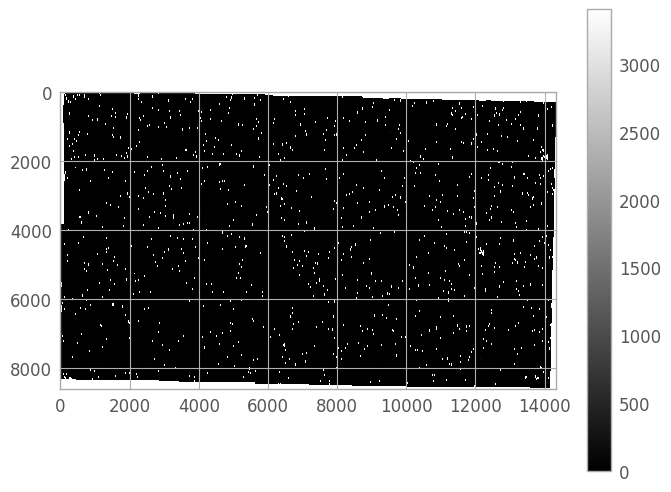

In [ ]:
# first attempt at plotting data

plt.figure()
plt.imshow(data, cmap='gray')
plt.colorbar()
plt.show()

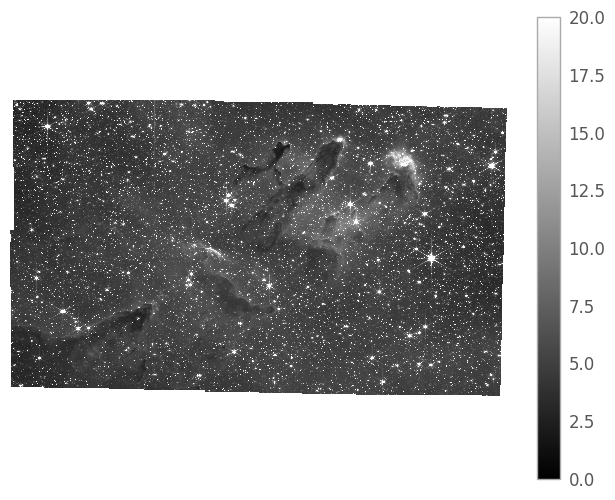

In [ ]:
# nearest interpolation → Avoids blurring by using nearest-neighbour interpolation
# vmin and vmax values help clip pixel values to our liking. This allows us to reveal faint structures.

plt.figure()
plt.imshow(data, cmap='gray', interpolation='nearest', vmin=0, vmax=20)
plt.colorbar()
plt.axis('off')
plt.show()


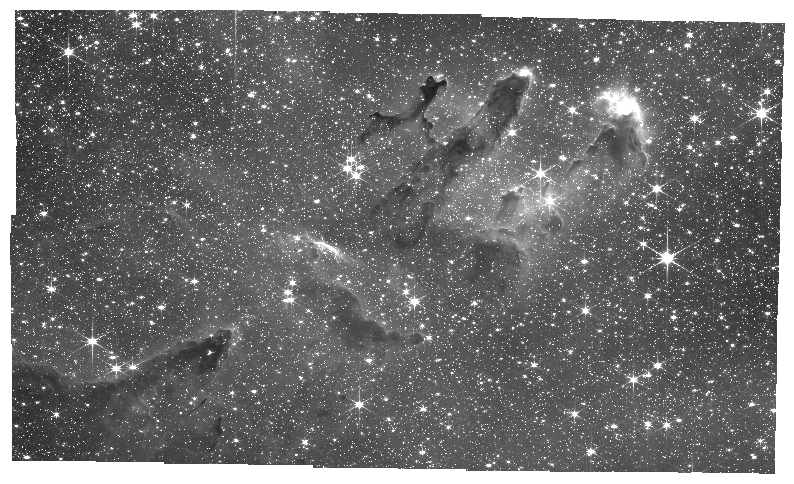

In [ ]:
import matplotlib.pyplot as plt

# Plotting your image
plt.figure(figsize=(10, 10))  # Adjust the figure size to increase resolution
plt.imshow(data, cmap='gray', interpolation='nearest', vmin=0, vmax=15)
plt.axis('off')

plt.draw()

plt.savefig('pillars_of_creation.png', dpi=300, bbox_inches='tight', pad_inches=0)  # Saves as PNG with high resolution

# Show the image
plt.show()

In [ ]:
pip install cmastro

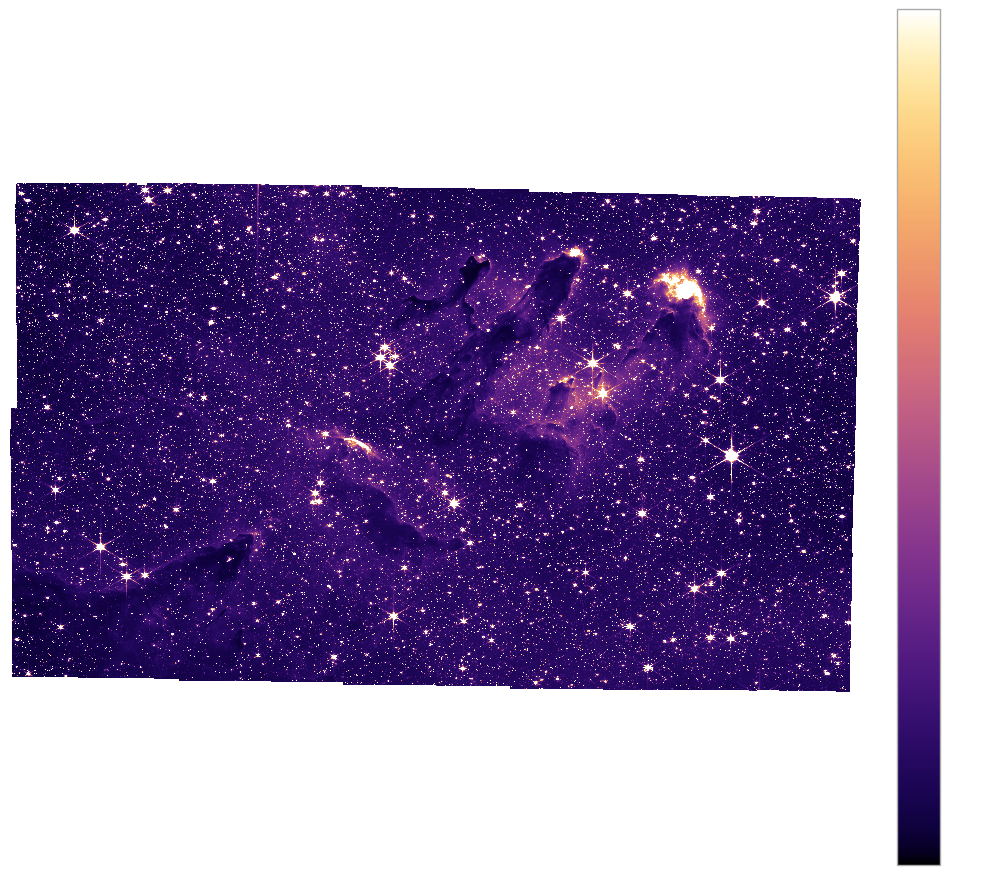

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import PowerNorm
import cmastro

colors = cmastro.cmaps['cma:hesperia']
# Define a custom colormap with a dark blue to black space and vibrant pillars

# Use PowerNorm with gamma > 1 to emphasize middle and high values
norm = PowerNorm(gamma=2.0, vmin=0, vmax=15)  # Use gamma > 1 to emphasize higher values

# Create the figure
plt.figure(figsize=(12, 12))  # Slightly larger figure for better detail
plt.imshow(data, cmap=colors, norm=norm, interpolation='nearest')

# Add a colorbar with labels
cbar = plt.colorbar(label='Intensity', orientation='vertical', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=12, colors='white')  # Make the ticks white for better contrast
cbar.set_label('Intensity', fontsize=14, color='white')  # Label the colorbar

# Aesthetic adjustments
plt.axis('off')  # Remove axes/gridlines
plt.title('NASA-Inspired Visualization: Pillars of Creation', fontsize=20, color='white', pad=20)

# Set the background color of the plot to black (mimicking outer space)
plt.gca().set_facecolor('black')

# Display the plot
plt.show()
